In [1]:
import pyreadr
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
path = './data/'

train_normal_path = 'TEP_FaultFree_Training.RData'
train_faulty_path = 'TEP_Faulty_Training.RData'

# test_normal_path = 'TEP_FaultFree_Testing.RData'
# test_faulty_path = 'TEP_Faulty_Testing.RData'

train_normal_complete = pyreadr.read_r(path + train_normal_path)['fault_free_training']
train_faulty_complete = pyreadr.read_r(path + train_faulty_path)['faulty_training']

# test_normal_complete = pyreadr.read_r(path + test_normal_path)['fault_free_testing']
# test_faulty_complete = pyreadr.read_r(path + test_faulty_path)['faulty_testing']

In [3]:
train_normal_complete.head()

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0.0,1.0,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,0.0,1.0,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,0.0,1.0,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,0.0,1.0,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,0.0,1.0,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461


In [4]:
train_faulty_complete.head()

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,1,1.0,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,1,1.0,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,1,1.0,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,1,1.0,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,1,1.0,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461


## Autocorrelation
### Train Normal

In [5]:
normal_df = train_normal_complete[train_normal_complete.simulationRun==1].iloc[:,3:] # [row,column]

In [8]:
normal_df.columns

Index(['xmeas_1', 'xmeas_2', 'xmeas_3', 'xmeas_4', 'xmeas_5', 'xmeas_6',
       'xmeas_7', 'xmeas_8', 'xmeas_9', 'xmeas_10', 'xmeas_11', 'xmeas_12',
       'xmeas_13', 'xmeas_14', 'xmeas_15', 'xmeas_16', 'xmeas_17', 'xmeas_18',
       'xmeas_19', 'xmeas_20', 'xmeas_21', 'xmeas_22', 'xmeas_23', 'xmeas_24',
       'xmeas_25', 'xmeas_26', 'xmeas_27', 'xmeas_28', 'xmeas_29', 'xmeas_30',
       'xmeas_31', 'xmeas_32', 'xmeas_33', 'xmeas_34', 'xmeas_35', 'xmeas_36',
       'xmeas_37', 'xmeas_38', 'xmeas_39', 'xmeas_40', 'xmeas_41', 'xmv_1',
       'xmv_2', 'xmv_3', 'xmv_4', 'xmv_5', 'xmv_6', 'xmv_7', 'xmv_8', 'xmv_9',
       'xmv_10', 'xmv_11'],
      dtype='object')

In [10]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

In [11]:
sm.tsa.acf(normal_df['xmeas_1'])

C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


array([ 1.00000000e+00,  6.03550283e-01,  2.12211973e-01,  2.28985714e-01,
        2.46531124e-01,  2.08077227e-01,  1.68731105e-01,  1.71617117e-01,
        1.70554961e-01,  1.42699617e-01,  1.20190630e-01,  1.28350294e-01,
        1.31084488e-01,  1.27867950e-01,  1.20718768e-01,  1.08411588e-01,
        9.99485644e-02,  1.03328594e-01,  1.05386718e-01,  8.82889868e-02,
        7.00940095e-02,  5.73047512e-02,  4.44950603e-02, -2.53071902e-04,
       -4.12607617e-02, -3.73018514e-02, -3.18166032e-02, -4.55549532e-02,
       -6.62611710e-02, -8.11364998e-02, -8.78623645e-02, -1.13537180e-01,
       -1.41880243e-01, -8.07156965e-02, -1.84254556e-02, -1.01767470e-01,
       -1.88690842e-01, -1.78105795e-01, -1.64275337e-01, -2.05380389e-01,
       -2.43671360e-01])

In [12]:
len(sm.tsa.acf(normal_df['xmeas_1']))

41

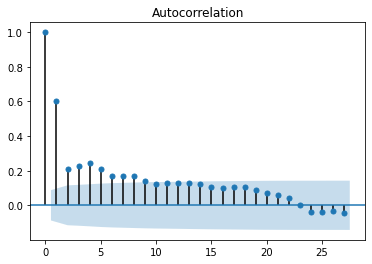

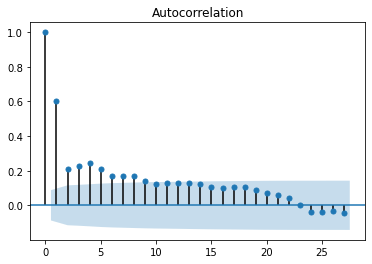

In [9]:
plot_acf(normal_df['xmeas_1'])

### Train Faulty

In [13]:
faulty_df = train_faulty_complete[(train_faulty_complete.simulationRun==1)&(train_faulty_complete.faultNumber==1)].iloc[:,3:]

In [14]:
sm.tsa.acf(faulty_df['xmeas_1'])

C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


array([ 1.        ,  0.97398933,  0.94816572,  0.93162971,  0.91505995,
        0.8960274 ,  0.87689521,  0.85307673,  0.82901713,  0.80366117,
        0.77844559,  0.74922935,  0.71983999,  0.68893554,  0.65797219,
        0.62575498,  0.5936919 ,  0.55804871,  0.52238199,  0.48477891,
        0.44720489,  0.40990809,  0.37269148,  0.33178924,  0.29106439,
        0.25014354,  0.20933021,  0.17130234,  0.13292801,  0.09509148,
        0.05763556,  0.02226943, -0.01315281, -0.04225684, -0.0714194 ,
       -0.10258136, -0.13378677, -0.1571598 , -0.18041443, -0.20479262,
       -0.22904195])

In [15]:
len(sm.tsa.acf(faulty_df['xmeas_1']))

41

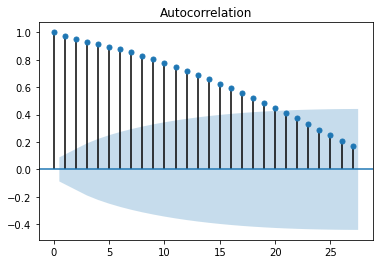

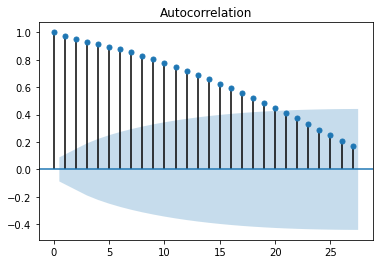

In [16]:
plot_acf(faulty_df['xmeas_1'])